<a href="https://colab.research.google.com/github/whomping-willow/ML_Final_Project/blob/main/Stroke_Pred_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Step#1: Acquisition of Data**

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Step#2&3: EDA & Preprocessing**

In [93]:
#We have already visualized different attributes, removed outliers and extreme values using WEKA
df= pd.read_csv('/content/drive/MyDrive/stroke-data-outlierRemoved.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Outlier,ExtremeValue
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,'never smoked',1,no,no
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,'never smoked',1,no,yes
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,no,no
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,'never smoked',1,no,yes
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,'formerly smoked',1,no,no


In [98]:
#Removing Outlier and ExtremeValue Column which are irrelevant to our dataset and was produced during WEKA operations.
df = df.drop(['Outlier', 'ExtremeValue'], axis=1)

In [99]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,'never smoked',1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,'never smoked',1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,'never smoked',1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,'formerly smoked',1


In [100]:
df.shape

(4945, 12)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4945 non-null   int64  
 1   gender             4945 non-null   object 
 2   age                4945 non-null   float64
 3   hypertension       4945 non-null   int64  
 4   heart_disease      4945 non-null   int64  
 5   ever_married       4945 non-null   object 
 6   work_type          4945 non-null   object 
 7   Residence_type     4945 non-null   object 
 8   avg_glucose_level  4945 non-null   float64
 9   bmi                4757 non-null   float64
 10  smoking_status     4945 non-null   object 
 11  stroke             4945 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 463.7+ KB


In [102]:
#Handling Missing Values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  188
smoking_status         0
stroke                 0
dtype: int64



> We have 188 null values on bmi column, well I will replce these NAN values with the mean as we don't have much data and BMI don't change that much.

In [103]:
#Replacing NaN with mean bmi
bmi_mean = df['bmi'].mean()
df['bmi'].fillna(value=bmi_mean, inplace=True)
bmi_mean

28.75110363674585

In [104]:
#Checking if any null value exists
df.isnull().sum().sum()

0

In [105]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.751104,'never smoked',1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,'never smoked',1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,'never smoked',1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,'formerly smoked',1
5,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,'never smoked',1
6,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,'never smoked',1
7,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.751104,Unknown,1
8,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
9,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.700000,'never smoked',1




> **Using Correlation matrix and Heatmap function for identifying the relevance of attributes with stroke.**





In [106]:
#Label Encoding of categorical data to numeric data for correlation analysis.
# We need to map categorical variables to numerical values if they are not already
# For example, if 'gender' is a categorical variable, we can map it to 0 and 1
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))



1.   gender -> Female: 0, Male: 1
2.   ever_married -> Yes: 1, No: 0
3.   work_type -> Govt_job: 0, children: 1, Private: 2, Self_employed: 3
4.   Residence_type -> Rural: 0, Urban: 1
5.   smoking_status -> formerly smoked: 0, never smoked: 1, Unknown: 2, smokes: 3



In [107]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,0,61.0,0,0,1,3,0,202.21,28.751104,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
2,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,24.000000,1,1
4,56669,1,81.0,0,0,1,2,1,186.21,29.000000,0,1
5,53882,1,74.0,1,1,1,2,0,70.09,27.400000,1,1
6,10434,0,69.0,0,0,0,2,1,94.39,22.800000,1,1
7,27419,0,59.0,0,0,1,2,0,76.15,28.751104,2,1
8,60491,0,78.0,0,0,1,2,1,58.57,24.200000,2,1
9,12109,0,81.0,1,0,1,2,0,80.43,29.700000,1,1


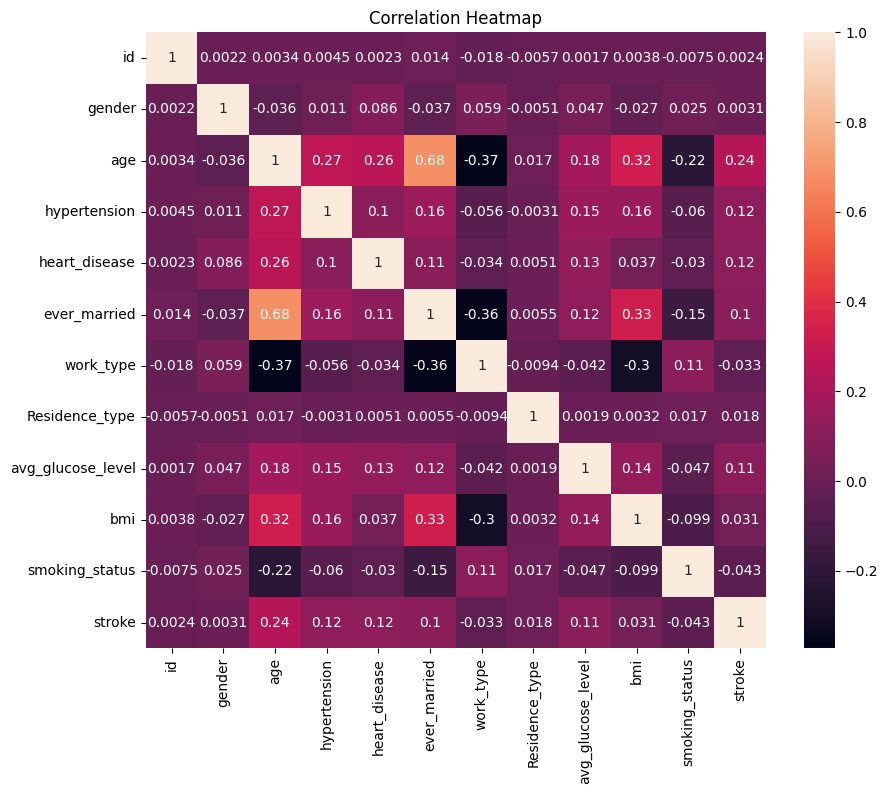

In [108]:
#Correlation Heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.title('Correlation Heatmap')
plt.show()



> ***Sorted attributes according to correlation values with target.***



In [109]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Get correlation values with target attribute (stroke)
correlation_with_target = correlation_matrix['stroke'].drop('stroke')  # Exclude target attribute from correlation values
correlation_with_target = correlation_with_target.abs()  # Take absolute values to consider both positive and negative correlations

# Sort attributes by relevance with target attribute
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Display sorted correlation values
print(sorted_correlation)


age                  0.241249
hypertension         0.123247
heart_disease        0.118696
avg_glucose_level    0.113923
ever_married         0.103179
smoking_status       0.042921
work_type            0.032915
bmi                  0.031204
Residence_type       0.018191
gender               0.003107
id                   0.002393
Name: stroke, dtype: float64


# **Step#04: Applying SMOTE**

In [118]:
# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

stroke
0    4718
1     227
Name: count, dtype: int64


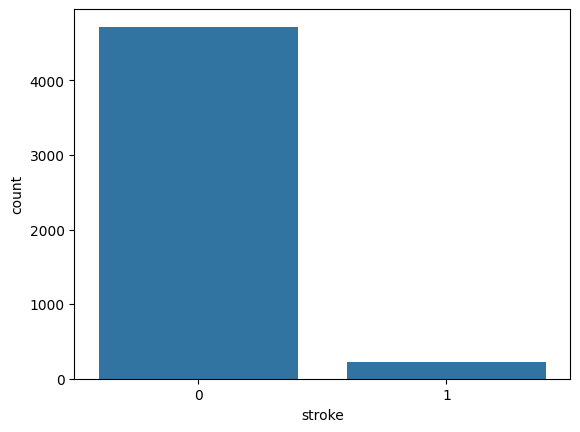

In [114]:
#Checking for imbalanced data
ax = sns.countplot(x='stroke',data=df)
print(df['stroke'].value_counts())



> *We can observe data imbalance. Let's oversample the minority class using SMOTE.*



In [120]:
pip install imbalanced-learn


In [119]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

stroke
1    4718
0    4718
Name: count, dtype: int64


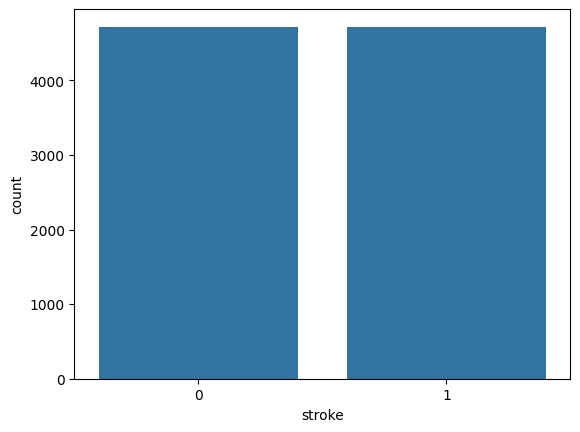

In [123]:
#Checking after applying SMOTE
# Convert y_resampled to DataFrame
y = pd.DataFrame(y, columns=['stroke'])
ax = sns.countplot(x='stroke',data=y)
print(y['stroke'].value_counts())

# **Step#05: Training Models**

In [110]:
#Importing Libraries for RandomFOrest, Logistic regression, XGBoost
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [112]:
# Define classifiers
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()

classifiers = {'Random Forest': rf_clf, 'Logistic Regression': lr_clf, 'XGBoost': xgb_clf}

# **Step#5,6: Testing, Validation, Accuracy**

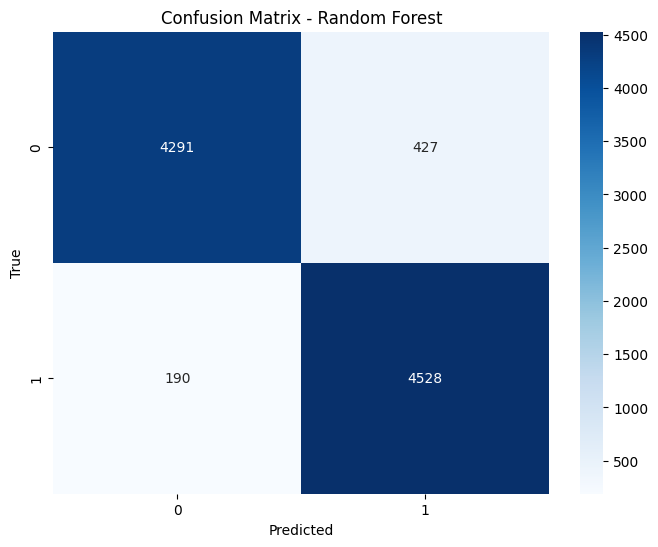

Classifier: Random Forest
Confusion Matrix:
[[4291  427]
 [ 190 4528]]
Accuracy: 0.9346121237812632
Precision: 0.913824419778002
Recall: 0.9597286986011022
F1 Score: 0.9362142044867157




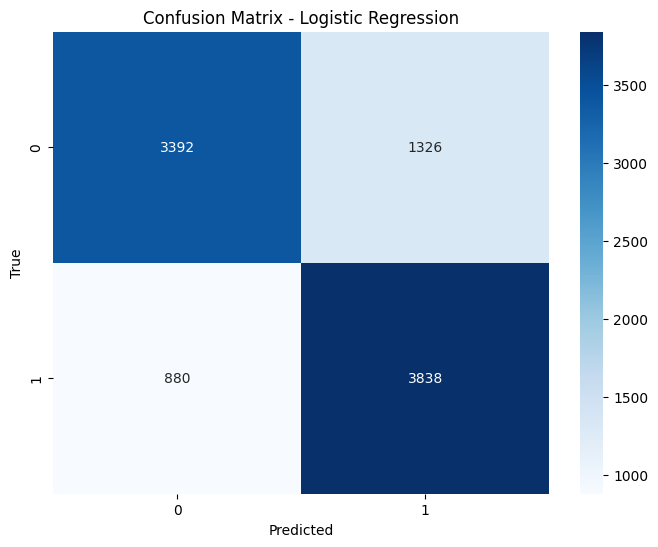

Classifier: Logistic Regression
Confusion Matrix:
[[3392 1326]
 [ 880 3838]]
Accuracy: 0.7662144976685036
Precision: 0.7432223082881487
Recall: 0.8134802882577363
F1 Score: 0.7767658368751263




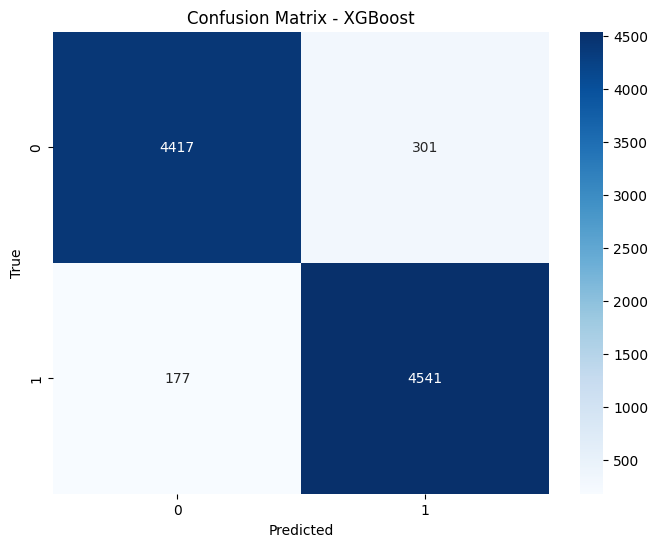

Classifier: XGBoost
Confusion Matrix:
[[4417  301]
 [ 177 4541]]
Accuracy: 0.9493429419245443
Precision: 0.9378356051218505
Recall: 0.9624841034336583
F1 Score: 0.95




In [126]:
# Cross-validation and evaluation
for name, clf in classifiers.items():
    # Cross-validation
    y_pred = cross_val_predict(clf, X, y, cv=5)

    # Compute performance metrics
    conf_matrix = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

     # Draw confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Print results
    print(f"Classifier: {name}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("\n")